#Chess Games from 12 Top players

The aim is to answer some questions:
- The most sacrificed piece?
- Player with the most wins?
- And the player who loses the most?
- Who is the most aggressive?
- Who is the most positional?

In [1]:
%cd ..
from google.colab import drive
drive.mount('content/gdrive')

/
Mounted at content/gdrive


In [2]:
# rename the path
!ln -s /content/gdrive/My\Drive/ /mydrive
#!ls 

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#1. Data: Piece information

In [4]:
path = "/mydrive/Data_Science_Projects/AnalysisChessGames/data/"
df = pd.read_csv(path+"Player_piece_info.csv")
print(df.shape)



(1787199, 9)


In [5]:
df.head(10)

,queen,rook,knight,bishop,pawn,move_num,file_name,color,player
0,1,2,2,2,8,1,Bogoljubow-Efim-D_vs_Alekhine-Alexander-A_1921...,Black,Alekhine
1,1,2,2,2,8,2,Bogoljubow-Efim-D_vs_Alekhine-Alexander-A_1921...,Black,Alekhine
2,1,2,2,2,8,3,Bogoljubow-Efim-D_vs_Alekhine-Alexander-A_1921...,Black,Alekhine
3,1,2,2,2,8,4,Bogoljubow-Efim-D_vs_Alekhine-Alexander-A_1921...,Black,Alekhine
4,1,2,2,2,8,5,Bogoljubow-Efim-D_vs_Alekhine-Alexander-A_1921...,Black,Alekhine
5,1,2,2,2,8,6,Bogoljubow-Efim-D_vs_Alekhine-Alexander-A_1921...,Black,Alekhine
6,1,2,2,2,8,7,Bogoljubow-Efim-D_vs_Alekhine-Alexander-A_1921...,Black,Alekhine
7,1,2,2,2,8,8,Bogoljubow-Efim-D_vs_Alekhine-Alexander-A_1921...,Black,Alekhine
8,1,2,2,2,8,9,Bogoljubow-Efim-D_vs_Alekhine-Alexander-A_1921...,Black,Alekhine
9,1,2,2,2,8,10,Bogoljubow-Efim-D_vs_Alekhine-Alexander-A_1921...,Black,Alekhine


Describe 

- queen: how many queens of the player on board
- rook: how many rooks of the player on board
- knight: how many knights of the player on board	
- bishop: how many bishops of the player on board	
- pawn: how many pawns of the player on board	
- move_num: the move number of the game. For example, 7 means 7th move.	
- file_name: the corresponding pgn file of the game	
- color: the color of the player
- player: the name of the player

In [6]:
df = df.drop('file_name', axis=1)


In [7]:
df.head(10)

,queen,rook,knight,bishop,pawn,move_num,color,player
0,1,2,2,2,8,1,Black,Alekhine
1,1,2,2,2,8,2,Black,Alekhine
2,1,2,2,2,8,3,Black,Alekhine
3,1,2,2,2,8,4,Black,Alekhine
4,1,2,2,2,8,5,Black,Alekhine
5,1,2,2,2,8,6,Black,Alekhine
6,1,2,2,2,8,7,Black,Alekhine
7,1,2,2,2,8,8,Black,Alekhine
8,1,2,2,2,8,9,Black,Alekhine
9,1,2,2,2,8,10,Black,Alekhine


In [8]:
df.isna().sum()

queen       0
rook        0
knight      0
bishop      0
pawn        0
move_num    0
color       0
player      0
dtype: int64

In [9]:
df.duplicated(keep=False).sum()

1655518

In [10]:
df = df.drop_duplicates(keep=False)

In [11]:
df.shape

(131681, 8)

In [12]:
df.move_num.min(), df.move_num.max() # Game moves range from 3 to 363

(3, 363)

In [13]:
df_queen = df.nlargest(10, 'queen')[['queen','move_num', 'player']]
df_queen

,queen,move_num,player
75954,3,45,Alekhine
75955,3,46,Alekhine
75956,3,47,Alekhine
1273291,3,155,Nakamura
1273292,3,156,Nakamura
1273293,3,157,Nakamura
23265,2,82,Alekhine
23266,2,83,Alekhine
23267,2,84,Alekhine
23268,2,85,Alekhine


Text(0, 0.5, 'Num of queen ')

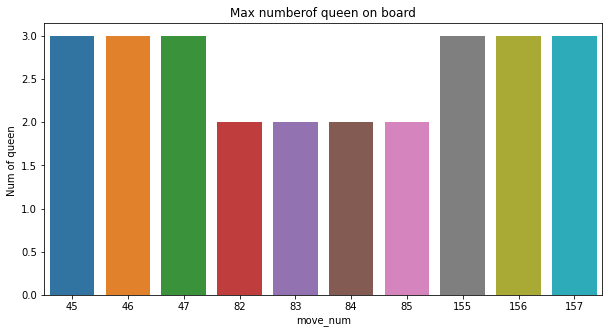

In [14]:
# Set the width and height of the figure
plt.figure(figsize=(10, 5))

# Add title
plt.title("Max numberof queen on board")

# Bar chart showing average arrival delay for Spirit Airlines flights by month
sns.barplot(x=df_queen.move_num, y=df_queen['queen'])

# Add label for vertical axis
plt.ylabel("Num of queen ")

In [15]:
df.sort_values(by='pawn', ascending=True).head(10)

,queen,rook,knight,bishop,pawn,move_num,color,player
436052,0,1,0,0,0,118,White,Botvinnik
832641,0,0,0,1,0,115,White,Caruana
832640,0,0,0,1,0,114,White,Caruana
832639,0,0,0,1,0,113,White,Caruana
832638,0,0,0,1,0,112,White,Caruana
830929,0,0,1,0,0,190,Black,Caruana
830928,0,0,1,0,0,189,Black,Caruana
830927,0,1,1,0,0,188,Black,Caruana
830926,0,1,1,0,0,187,Black,Caruana
830925,0,1,1,0,0,186,Black,Caruana


In [16]:
df['pawn'].value_counts()

4    20176
6    19424
3    19216
5    18694
7    17210
2    14900
1    10850
0     6670
8     4541
Name: pawn, dtype: int64

6670 finais do jogo não havia pawn, isso representa 5 % do total de jogos.


(-1.1022525448733027,
 1.1001072640415859,
 -1.1024227896255532,
 1.1012787443822083)

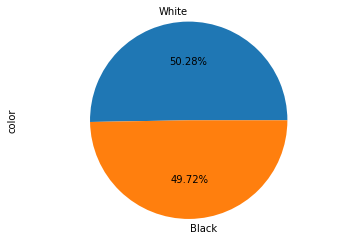

In [17]:
# com pandas
df.color.value_counts().plot(kind='pie', autopct='%.2f%%')
plt.axis('equal')


In [18]:

# com seaborn
#sns.factorplot('color', data=df.index, kind='count')

'''def average_piece(num_piece, n):
  total = 0
  for i in range(1, n):
    total = total + sum(num_piece)
  
  return total/n
  
  def life_piece(piece, num_piece):
  if piece in ['rook',	'knight',	'bishop']:
    print("piece equal 2")
    return average_piece(num_piece, 2)
  elif piece == 'queen':
    print('queen')
    return average_piece(num_piece, 1)
  else:
    print('pawn')
    return average_piece(num_piece, 8)'''

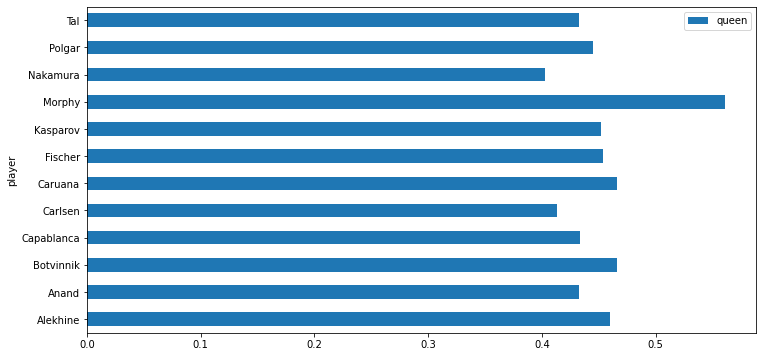

In [68]:

df.groupby('player', as_index='False').agg({"queen": "mean"}).plot(kind='barh', figsize=(12,6))
#life_piece('queen', 10)


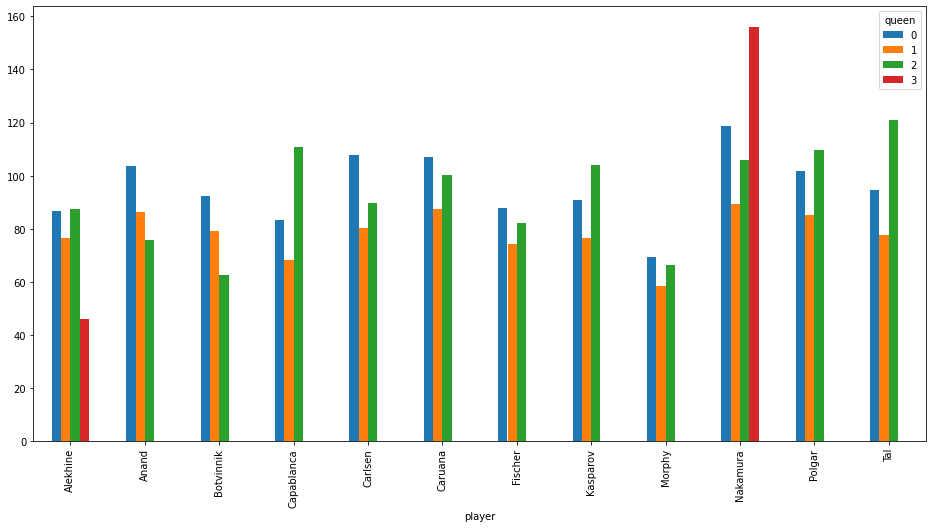

In [67]:
df.pivot_table(index='player', columns='queen').plot(kind='bar', y='move_num', figsize=(16, 8))

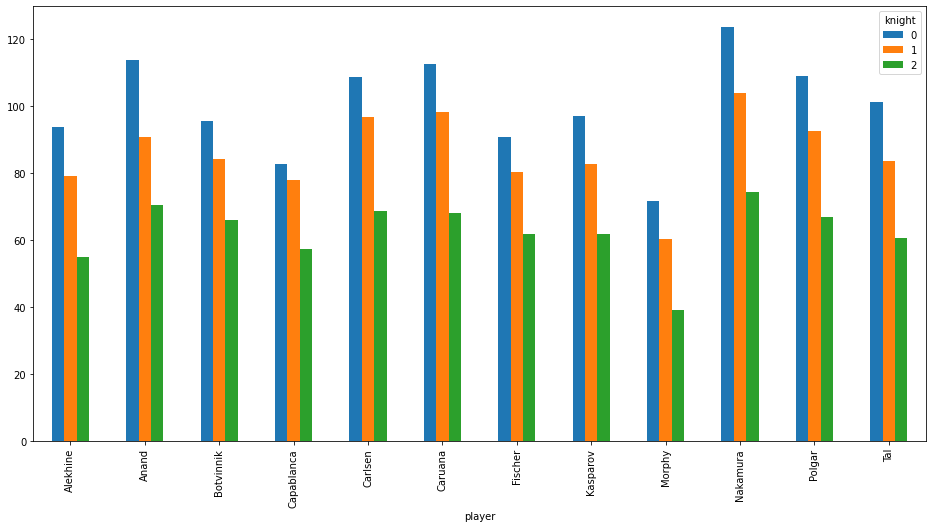

In [62]:
df.pivot_table(index='player', columns='knight').plot(kind='bar', y='move_num', figsize=(16, 8))

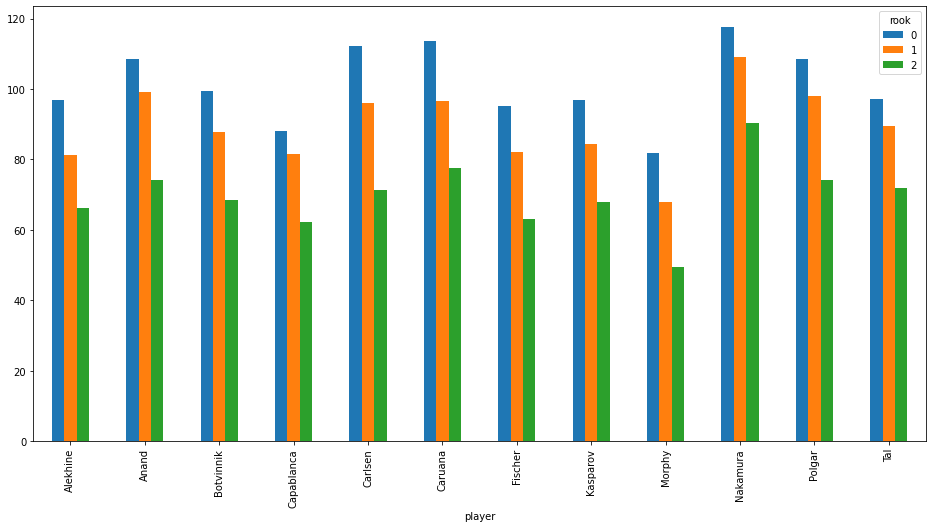

In [64]:
df.pivot_table(index='player', columns='rook').plot(kind='bar', y='move_num', figsize=(16, 8))

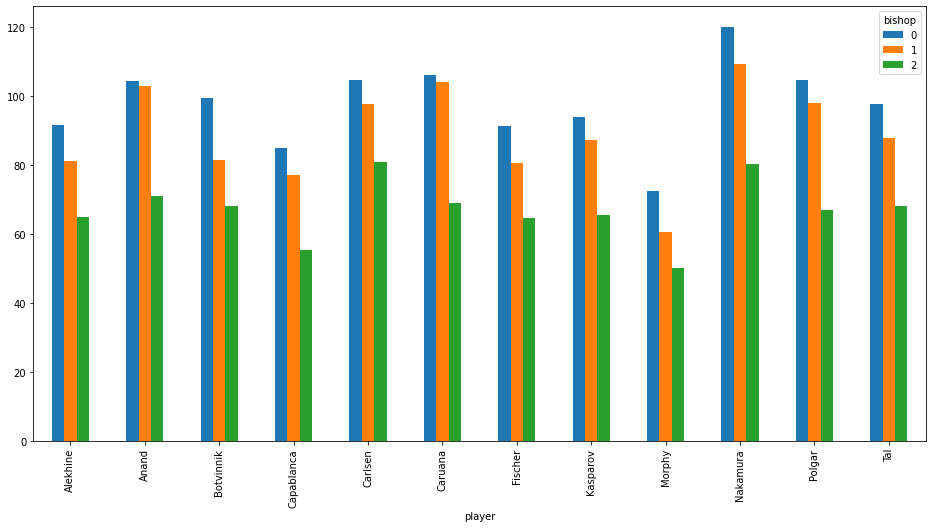

In [65]:
df.pivot_table(index='player', columns='bishop').plot(kind='bar', y='move_num', figsize=(16, 8))

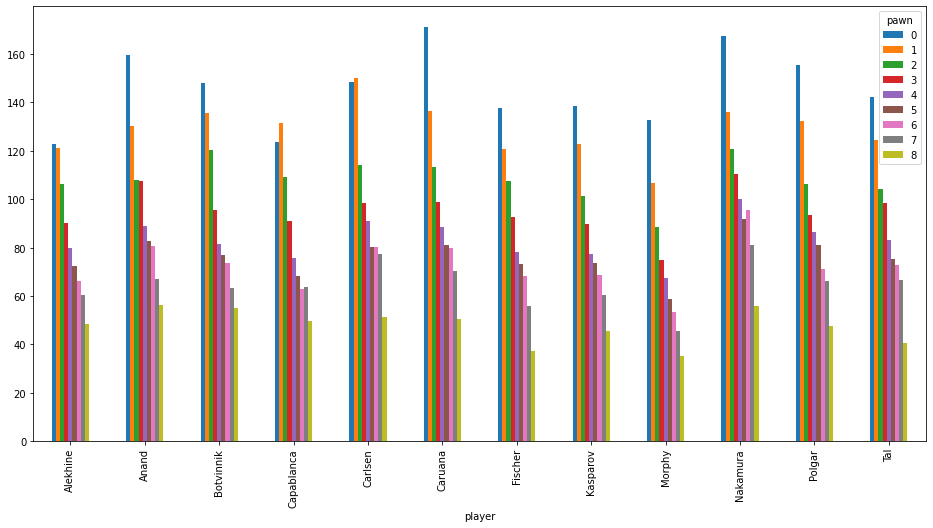

In [66]:
df.pivot_table(index='player', columns='pawn').plot(kind='bar', y='move_num', figsize=(16, 8))

#2. Data: Sacrificed piece value adding up for each game

In [ ]:
path = "/mydrive/Data_Science_Projects/AnalysisChessGames/data/"
sac_df = pd.read_csv(path + 'Player_piece_sac_data.csv')
sac_df.shape

(21587, 5)

In [ ]:
sac_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21587 entries, 0 to 21586
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   player     21587 non-null  object 
 1   color      21587 non-null  object 
 2   moves      21587 non-null  int64  
 3   total_sac  21587 non-null  float64
 4   file_name  21587 non-null  object 
dtypes: float64(1), int64(1), object(3)
memory usage: 843.4+ KB


In [ ]:
sac_df.describe()

,moves,total_sac
count,21587.000000,21587.000000
mean,82.790522,5.382916
std,34.441707,4.948022
min,0.000000,0.000000
25%,60.000000,1.000000
50%,79.000000,4.500000
75%,101.000000,8.500000
max,363.000000,28.000000


In [ ]:
sac_df.head(10)

,player,color,moves,total_sac,file_name
0,Alekhine,Black,108,13.5,Bogoljubow-Efim-D_vs_Alekhine-Alexander-A_1921...
1,Alekhine,White,116,2.0,Alekhine-Alexander-A_vs_Rico-Antonio_1945.__._...
2,Alekhine,Black,88,12.0,Koltanowski-George_vs_Alekhine-Alexander-A_193...
3,Alekhine,White,63,0.0,Alekhine-Alexander-A_vs_Guimard-Carlos-E_1938....
4,Alekhine,Black,86,2.5,Marco-Georg_vs_Alekhine-Alexander-A_1921.__.__...
5,Alekhine,White,76,13.5,Alekhine-Alexander-A_vs_Teichmann-Richard_1921...
6,Alekhine,Black,104,0.0,Henneberger-Walter_vs_Alekhine-Alexander-A_193...
7,Alekhine,Black,81,2.0,Spielmann-Rudolf_vs_Alekhine-Alexander-A_1927....
8,Alekhine,Black,66,0.0,Capablanca-Jose-Raul_vs_Alekhine-Alexander-A_1...
9,Alekhine,Black,75,8.5,Teichmann-Richard_vs_Alekhine-Alexander-A_1921...


In [ ]:
sac_df = sac_df.drop('file_name', axis=1)

In [ ]:
sac_df.head(10)

,player,color,moves,total_sac
0,Alekhine,Black,108,13.5
1,Alekhine,White,116,2.0
2,Alekhine,Black,88,12.0
3,Alekhine,White,63,0.0
4,Alekhine,Black,86,2.5
5,Alekhine,White,76,13.5
6,Alekhine,Black,104,0.0
7,Alekhine,Black,81,2.0
8,Alekhine,Black,66,0.0
9,Alekhine,Black,75,8.5
